<a href="https://colab.research.google.com/github/saincoder404/xeven_AI/blob/master/Lecture_16_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [198]:
dataset = pd.read_csv('/content/titanic.csv')

In [199]:
# Data shape
print(f'Train Data: {dataset.shape}')

Train Data: (891, 12)


In [200]:
# View first few rows
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [201]:
# Data info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


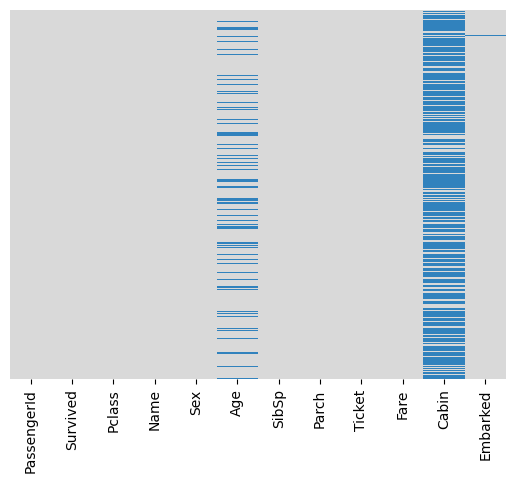

In [202]:
# generate heatmap for null data

sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'tab20c_r')
plt.show()

<ipython-input-203-0603ce2a011f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Pclass', y = 'Age', data = dataset, palette = 'GnBu_d').set_title('Age by passenger')


Text(0.5, 1.0, 'Age by passenger')

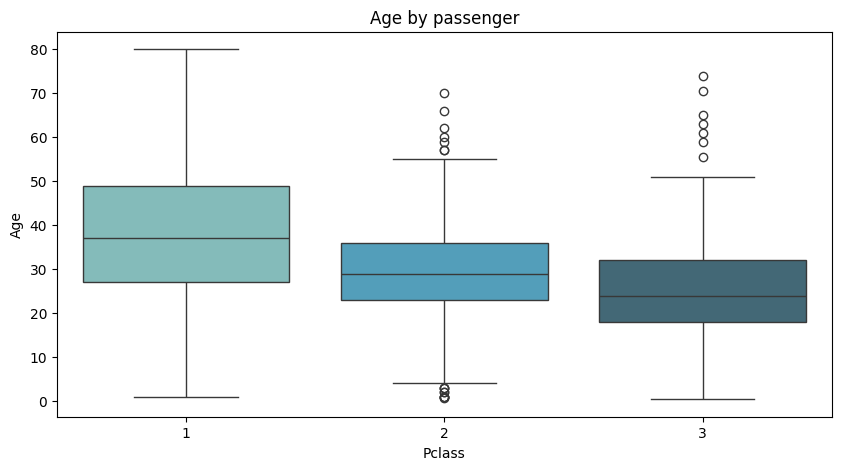

In [203]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Pclass', y = 'Age', data = dataset, palette = 'GnBu_d').set_title('Age by passenger')

In [204]:
# imputation function
def impute_age(columns):
  Age = columns[0]
  Pclass = columns[1]

  if pd.isnull(Age):

    if Pclass == 1:
      return 37

    elif Pclass == 2:
      return 29

    else:
      return 24

  else:
    return Age


# applying the function to  the Age column

dataset['Age'] = dataset[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [205]:
# remove Cabin feature
dataset.drop('Cabin', axis = 1, inplace = True)

In [206]:
# remove value with missing data
dataset.dropna(inplace = True)

In [207]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [208]:
# remove unnecessary columns
dataset.drop(['Name', 'Ticket'], axis = 1, inplace =True)

# convert object type into catogery data type

objects = ['Sex', 'Embarked']

for colname in objects:
  dataset[colname] = dataset[colname].astype('category')

In [209]:
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,24.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


Numerica Features

In [210]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [211]:
# Remove pssenger ID

dataset.drop('PassengerId', axis = 1, inplace = True)

# ***Getting Model Ready***

In [212]:
dataset.shape

(889, 8)

In [213]:
dataset.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [214]:
sex = pd.get_dummies(dataset['Sex'], drop_first = True)
embarked = pd.get_dummies(dataset['Embarked'], drop_first = True)

In [215]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [216]:
# add dummy data to dataset
dataset = pd.concat([dataset, sex, embarked], axis = 1)
dataset.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,True,False,True


In [217]:
# Now drop sex and embarked data
dataset.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [218]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


***Machine Learning***

In [219]:
# Tagret variable spliting
# separate feature and target varaible
x = dataset.drop('Survived', axis = 1)
y = dataset['Survived']

In [220]:
x

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,True,False,True
887,1,19.0,0,0,30.0000,False,False,True
888,3,24.0,1,2,23.4500,False,False,True
889,1,26.0,0,0,30.0000,True,False,False


In [221]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [222]:
x.shape

(889, 8)

In [223]:
y.shape

(889,)

In [224]:
# Use x and y variables to split the training data inti train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 101)

In [225]:
x_train.shape
x_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
307,1,17.0,1,0,108.9000,False,False,False
229,3,24.0,3,1,25.4667,False,False,True
82,3,24.0,0,0,7.7875,False,True,False
353,3,25.0,1,0,17.8000,True,False,True
707,1,42.0,0,0,26.2875,True,False,True
...,...,...,...,...,...,...,...,...
576,2,34.0,0,0,13.0000,False,False,True
840,3,20.0,0,0,7.9250,True,False,True
338,3,45.0,0,0,8.0500,True,False,True
524,3,24.0,0,0,7.2292,True,False,False


In [227]:
y_train.shape
y_train

307    1
229    0
82     1
353    0
707    1
      ..
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 711, dtype: int64

In [228]:
x_test.shape
x_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,3,24.0,0,0,8.0500,True,False,True
613,3,24.0,0,0,7.7500,True,True,False
615,2,24.0,1,2,65.0000,False,False,True
337,1,41.0,0,0,134.5000,False,False,False
718,3,24.0,0,0,15.5000,True,True,False
...,...,...,...,...,...,...,...,...
155,1,51.0,0,1,61.3792,True,False,False
450,2,36.0,1,2,27.7500,True,False,True
756,3,28.0,0,0,7.7958,True,False,True
187,1,45.0,0,0,26.5500,True,False,True


In [229]:
y_test.shape
y_test

511    0
613    0
615    1
337    1
718    0
      ..
155    0
450    0
756    0
187    1
180    0
Name: Survived, Length: 178, dtype: int64

# ***Model Training***

In [231]:
# Fit
# import model
from sklearn.linear_model import LogisticRegression

In [232]:
model = LogisticRegression()

In [233]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

***Model Test***

*Class Predicition*

In [235]:
y_predict = model.predict(x_test)
print(y_predict)
print(y_predict.shape)

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
(178,)


In [238]:
probabilities = model.predict_proba(x_test)[:, 1]
print(probabilities.shape)
print(probabilities)

(178,)
[0.10915127 0.17773884 0.74863063 0.92024789 0.17923771 0.04185239
 0.11552158 0.23001998 0.07873819 0.67545481 0.78841017 0.94478461
 0.10913149 0.57761948 0.10933738 0.12252589 0.91641276 0.84248052
 0.54123867 0.09994164 0.10922985 0.0868429  0.42374298 0.34700701
 0.04218935 0.43905695 0.60009198 0.5892852  0.09286304 0.29915605
 0.09259718 0.25428985 0.0122366  0.10595792 0.10908021 0.11023797
 0.75631969 0.06360494 0.12243807 0.13434634 0.53049561 0.137305
 0.11903788 0.92785712 0.61223239 0.12691113 0.61587824 0.86598691
 0.10279812 0.26663971 0.48908488 0.7981049  0.16922781 0.12280859
 0.10902308 0.0718876  0.42735021 0.08616499 0.07421311 0.91080168
 0.67545481 0.93446331 0.88915289 0.08643931 0.13956377 0.04970037
 0.11557597 0.43211761 0.05795062 0.14299847 0.3381727  0.13570575
 0.61976683 0.88748463 0.11184754 0.7294167  0.08099363 0.13570575
 0.1036702  0.29700399 0.2992583  0.37619836 0.4506877  0.12252589
 0.28128942 0.65863248 0.07121188 0.87044956 0.09879186 0

# *probabilities along with classes*

In [245]:
for i in range (len(y_test)):
  print(round(probabilities[i], 3), '----->',y_predict[i])

0.109 -----> 0
0.178 -----> 0
0.749 -----> 1
0.92 -----> 1
0.179 -----> 0
0.042 -----> 0
0.116 -----> 0
0.23 -----> 0
0.079 -----> 0
0.675 -----> 1
0.788 -----> 1
0.945 -----> 1
0.109 -----> 0
0.578 -----> 1
0.109 -----> 0
0.123 -----> 0
0.916 -----> 1
0.842 -----> 1
0.541 -----> 1
0.1 -----> 0
0.109 -----> 0
0.087 -----> 0
0.424 -----> 0
0.347 -----> 0
0.042 -----> 0
0.439 -----> 0
0.6 -----> 1
0.589 -----> 1
0.093 -----> 0
0.299 -----> 0
0.093 -----> 0
0.254 -----> 0
0.012 -----> 0
0.106 -----> 0
0.109 -----> 0
0.11 -----> 0
0.756 -----> 1
0.064 -----> 0
0.122 -----> 0
0.134 -----> 0
0.53 -----> 1
0.137 -----> 0
0.119 -----> 0
0.928 -----> 1
0.612 -----> 1
0.127 -----> 0
0.616 -----> 1
0.866 -----> 1
0.103 -----> 0
0.267 -----> 0
0.489 -----> 0
0.798 -----> 1
0.169 -----> 0
0.123 -----> 0
0.109 -----> 0
0.072 -----> 0
0.427 -----> 0
0.086 -----> 0
0.074 -----> 0
0.911 -----> 1
0.675 -----> 1
0.934 -----> 1
0.889 -----> 1
0.086 -----> 0
0.14 -----> 0
0.05 -----> 0
0.116 -----> 0
0.432

**Model Evaluation**

In [249]:
# Score it
from sklearn.metrics import classification_report, accuracy_score

print('Classification Model')
# Accuracy
print('__'*30)
model_accuracy = round(accuracy_score(y_test, y_predict) *100, 2)

print(f"Accuracy: {model_accuracy} %")

Classification Model
____________________________________________________________
Accuracy: 82.02 %


***Interpretation***